<a href="https://colab.research.google.com/github/NdopnnoabasiJames/Machine-Learning-Models/blob/main/LogisticRegressionOnLoanData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries and Load Dataset

Before building our logistic regression model, we’ll start by importing the essential Python libraries for data analysis and visualization:

- **pandas** – for handling and analyzing data  
- **numpy** – for numerical operations  
- **matplotlib** and **seaborn** – for plotting and visualizing relationships in the data  

After that, we’ll load our dataset (`loan_data.csv`) and take a look at the first few rows to understand its structure.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ML_Datasets/loan_data.csv')

# Display the first 10 rows so we can see the datastructure
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [30]:
print("\nDataset Information:")
df.info()

print("\nDescriptive Statistics for Numerical Columns:")
print(df.describe())

print("\nChecking for Missing Values:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_l

### Step 2: Understanding the Dataset

From our quick inspection, we can tell the dataset contains **45,000 loan records** with **14 features**.  
Each row represents a loan applicant with attributes like age, income, education, employment experience, credit score, and loan amount.  

Our target variable is **`loan_status`**, where:
- `1` indicates loan **approved (or good loan)**  
- `0` indicates loan **denied (or defaulted)**  

We also have categorical features such as:
- `person_gender`, `person_education`, `person_home_ownership`, `loan_intent`, and `previous_loan_defaults_on_file`.

Before modeling, let's explore how some of these features relate to the target.

We’ll visualize a few relationships and check the class balance.

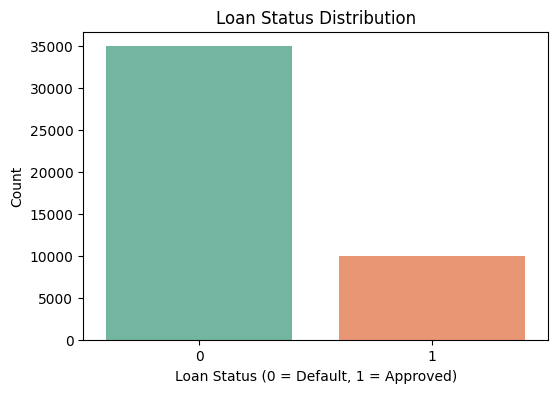

,proportion
loan_status,
0,0.777778
1,0.222222


In [31]:
# Countplot for the target variable
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status (0 = Default, 1 = Approved)')
plt.ylabel('Count')
plt.show()

# Check value counts
df['loan_status'].value_counts(normalize=True)

### Step 3: Exploring Relationships Between Features and Loan Status

The dataset is imbalanced — around 78% of applicants did not get approved.  

That’s important to note because logistic regression (and most ML models) can become biased toward the majority class if not handled properly.
We’ll keep this in mind for later when we deal with class weighting or resampling.

Let's now explore how some key features like age, income, and credit score differ between approved and non-approved applicants.

Now let's visualize those relationships

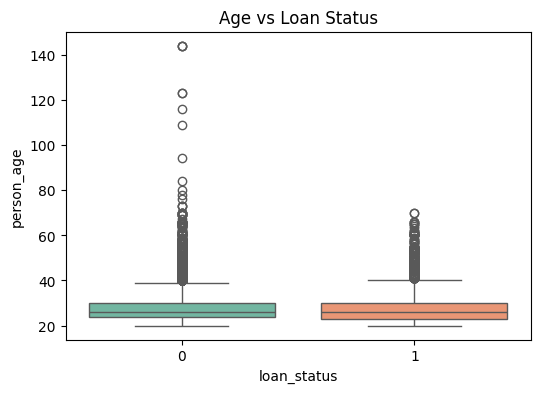

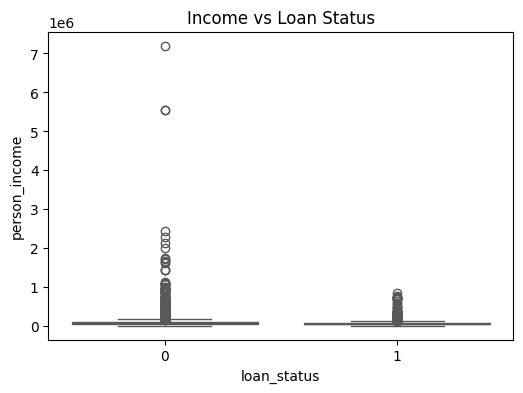

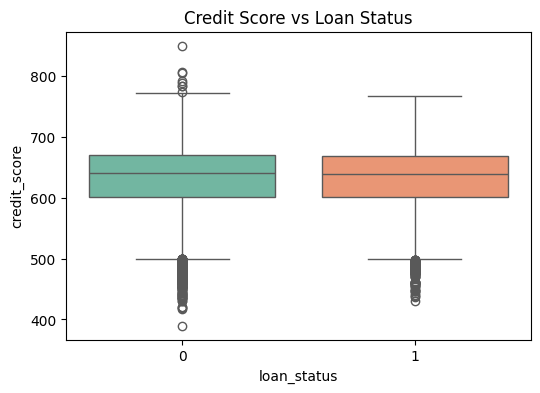

In [32]:
# Age vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='loan_status', y='person_age', palette='Set2')
plt.title('Age vs Loan Status')
plt.show()

# Income vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='loan_status', y='person_income', palette='Set2')
plt.title('Income vs Loan Status')
plt.show()

# Credit Score vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='loan_status', y='credit_score', palette='Set2')
plt.title('Credit Score vs Loan Status')
plt.show()

Now let's move next to encoding the categorical features (like person_gender, education, home_ownership, etc.) so we can prepare the data for logistic regression?

Let’s start by identifying all categorical columns so we can encode them properly — since logistic regression only works with numerical data.


In [33]:
#  Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')

Numerical Columns:
Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status'],
      dtype='object')


Let’s now encode the categorical columns so the model can interpret them.
We’ll use One-Hot Encoding for features with multiple categories (like education or home ownership) and Label Encoding for binary ones (like gender or previous_loan_defaults_on_file).

In [34]:
# Encode categorical variables

from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Label encode binary columns
binary_cols = ['person_gender', 'previous_loan_defaults_on_file']
label_encoder = LabelEncoder()

for col in binary_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# One-hot encode multi-category columns
df_encoded = pd.get_dummies(df_encoded,
                            columns=['person_education', 'person_home_ownership', 'loan_intent'],
                            drop_first=True)

# Verify encoding
df_encoded.head()



,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,False,True,False,False,True,False,False,False,True,False
1,21.0,0,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,True,False,False,True,False,True,False,False,False,False
2,25.0,0,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,True,False,False,False,False,False,False,True,False,False
3,23.0,0,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,False,False,False,False,True,False,False,True,False,False
4,24.0,1,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,False,True,False,False,True,False,False,True,False,False


Explanation:

	•	LabelEncoder() converts binary text columns like Male/Female or Y/N into 0s and 1s.
	•	pd.get_dummies() creates extra columns for multi-category features, dropping one to avoid redundancy (drop_first=True handles that).
	•	This keeps the dataset numerical and avoids multicollinearity.

Next, let’s:

	1.	Separate the features (X) and the target (y)
	2.	Split into training and test sets for evaluation

In [35]:
# Split features and target
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36000, 22), (9000, 22), (36000,), (9000,))

Explanation:

	•	loan_status is the target we want to predict.
	•	train_test_split() divides data into 80% training and 20% testing for evaluation.
	•	stratify=y ensures both sets maintain the same balance of loan approvals (0s and 1s).

In [36]:
# Import and Innitialize the model

from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

We import LogisticRegression from scikit-learn and create an instance of it.
The max_iter=1000 ensures the optimization process has enough iterations to converge (especially for larger datasets).
random_state=42 again keeps our results reproducible.


In [37]:
# Train (fit) the model

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

This trains the model by finding the best coefficients (weights) for each feature that best separate approved vs. not approved loans.

In [38]:
# Make Predictions
y_pred = log_reg.predict(X_test)


This uses the trained model to predict the loan status for the test data.

In [39]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# We measure how well the model performed — overall accuracy, per-class precision/recall/F1-score, and a confusion
# matrix to show the actual vs. predicted classifications.

Accuracy: 0.8883333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      7000
           1       0.76      0.73      0.74      2000

    accuracy                           0.89      9000
   macro avg       0.84      0.83      0.84      9000
weighted avg       0.89      0.89      0.89      9000


Confusion Matrix:
 [[6530  470]
 [ 535 1465]]


## **Model Evaluation Summary**

Accuracy: 0.888 (≈ 88.8%)
The model correctly predicted about 89% of all loan statuses.

Precision:

	•	Class 0 (Loan Not Approved): 0.92
	•	Class 1 (Loan Approved): 0.76
The model is more reliable when predicting loan denials.

Recall:

	•	Class 0: 0.93
	•	Class 1: 0.73
It identifies most denials correctly but misses some approvals.

F1-Score:
	•	Class 0: 0.93
	•	Class 1: 0.74
→ Balanced performance, though weaker for approved loans.

Confusion Matrix Interpretation:

[[6530  470]

[ 535 1465]]

	•	True Negatives (6530): Correctly predicted denials.
	•	False Positives (470): Wrongly approved loans (should’ve been denied).
	•	False Negatives (535): Missed approvals (should’ve been approved).
	•	True Positives (1465): Correctly approved loans.

Summary Insight:
The model performs very well overall, especially at identifying non-approvals.
However, it’s slightly biased toward predicting denials and could improve recall for approved loans (class 1).

In [40]:
# Handle Class Imbalance using Class Weights

# Re-train Logistic Regression model with class_weight='balanced'
# This tells the model to give more importance to the minority class (loan approvals - class 1)
from sklearn.linear_model import LogisticRegression

model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model_balanced.fit(X_train, y_train)

# Predict on test data
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate the new model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nClassification Report:\n", classification_report(y_test, y_pred_balanced))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))

# Using class_weight='balanced' automatically adjusts the weights inversely proportional to class frequencies.
# This helps the model pay more attention to the minority class (loan approvals) and can improve recall for class 1.

Accuracy: 0.8428888888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89      7000
           1       0.59      0.93      0.72      2000

    accuracy                           0.84      9000
   macro avg       0.78      0.87      0.81      9000
weighted avg       0.89      0.84      0.85      9000


Confusion Matrix:
 [[5736 1264]
 [ 150 1850]]


##**Model with Class Weights (Balanced) – Summary**

Accuracy: 0.843
(↓ dropped slightly from 0.888)

Interpretation of Classification Report:

	•	Class 0 (Loan Denied):
	•	Precision = 0.97 → still very high
	•	Recall = 0.82 → decreased (the model now misclassifies some “denied” loans as “approved”)
	•	Class 1 (Loan Approved):
	•	Precision = 0.59 → lower (more false positives)
	•	Recall = 0.93 → improved significantly! (model now catches almost all actual approvals)

Confusion Matrix Breakdown:

	•	True Negatives (5736): correctly predicted “denied”
	•	False Positives (1264): predicted “approved” when it was actually denied
	•	False Negatives (150): predicted “denied” when it was actually approved
	•	True Positives (1850): correctly predicted “approved”

Conclusion:
By using class_weight='balanced', the model became more sensitive to detecting approved loans (class 1), improving recall from 0.73 → 0.93.

However, this came at the expense of accuracy and precision, meaning it now produces more false alarms.

Instead of letting scikit-learn decide the class weights automatically (class_weight='balanced'), we’ll assign manual weights to give a bit more importance to class 1 (the minority class) — but not too much, so we don’t hurt accuracy too badly.

Let’s start by trying a few ratios and comparing their results.


In [41]:
# We’ll start with a 1 : 2 ratio (class 0 = 1, class 1 = 2).

# Step 1: Train logistic regression with custom class weights
model_weighted = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
model_weighted.fit(X_train, y_train)

# Step 2: Evaluate model performance
y_pred_weighted = model_weighted.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_weighted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_weighted))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_weighted))

Accuracy: 0.8642222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7000
           1       0.65      0.85      0.73      2000

    accuracy                           0.86      9000
   macro avg       0.80      0.86      0.82      9000
weighted avg       0.88      0.86      0.87      9000


Confusion Matrix:
 [[6085  915]
 [ 307 1693]]


Model Performance Summary (Manual Class Weights: {0:1, 1:2})

	•	Accuracy: 0.864
	•	Precision (Class 0): 0.95
	•	Recall (Class 0): 0.87
	•	Precision (Class 1): 0.65
	•	Recall (Class 1): 0.85
	•	F1-Score (Class 1): 0.73

Confusion Matrix Interpretation:

	•	True Negatives (TN): 6085 — Correctly predicted loans that were not approved (0)
	•	False Positives (FP): 915 — Predicted as approved when they weren’t
	•	False Negatives (FN): 307 — Missed actual approved loans
	•	True Positives (TP): 1693 — Correctly predicted approved loans

Interpretation

Giving class 1 (approved loans) double weight made the model:

	•	Much more sensitive to class 1 — Recall for class 1 rose from 0.73 → 0.85
	•	Slightly reduced accuracy (0.89 → 0.86), but improved fairness toward both classes.
	•	Fewer missed approvals (FN) — great for applications like loan prediction, where missing a likely good borrower is costly.

This is a better trade-off between overall accuracy and recall for the minority class.